In [ ]:
%pip install pandas numpy matplotlib seaborn wordcloud scikit-learn nltk altair -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

calls_df = pd.read_csv('calls.csv')
customers_df = pd.read_csv('customers.csv')
reason_df = pd.read_csv('reason.csv')
sentiment_df = pd.read_csv('sentiment_statistics.csv')
test_df = pd.read_csv('test.csv')


In [36]:
test_df.head()

,call_id
0,7732610078
1,2400299738
2,6533095063
3,7774450920
4,9214147168


In [3]:
# Display basic information about the datasets
print("Calls Dataset:")
print(calls_df.info())
print("\nCustomers Dataset:")
print(customers_df.info())
print("\nReason Dataset:")
print(reason_df.info())
print("\nSentiment Statistics Dataset:")
print(sentiment_df.info())
print("\nTest Dataset:")
print(test_df.info())

Calls Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   call_id                  71810 non-null  int64 
 1   customer_id              71810 non-null  int64 
 2   agent_id                 71810 non-null  int64 
 3   call_start_datetime      71810 non-null  object
 4   agent_assigned_datetime  71810 non-null  object
 5   call_end_datetime        71810 non-null  object
 6   call_transcript          71810 non-null  object
dtypes: int64(3), object(4)
memory usage: 3.8+ MB
None

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       71810 non-null  int64  
 1   customer_name     71810 non-null  object 
 2   elite_level_code  46043 

In [7]:
print("\nMissing Values:")
print(calls_df.isnull().sum())

# 2. Describe numerical columns
print("\nNumerical Columns Summary:")
print("Size of Calls Dataset: ", calls_df.shape)
print(calls_df.describe())




Missing Values:
call_id                    0
customer_id                0
agent_id                   0
call_start_datetime        0
agent_assigned_datetime    0
call_end_datetime          0
call_transcript            0
dtype: int64

Numerical Columns Summary:
Size of Calls Dataset:  (71810, 7)
            call_id   customer_id       agent_id
count  7.181000e+04  7.181000e+04   71810.000000
mean   4.993574e+09  5.004334e+09  564768.278039
std    2.889673e+09  2.884255e+09  257532.362167
min    1.316420e+05  1.197800e+04  102574.000000
25%    2.480013e+09  2.514618e+09  347606.000000
50%    4.989448e+09  4.999664e+09  591778.000000
75%    7.493629e+09  7.509126e+09  786323.000000
max    9.999806e+09  9.999935e+09  993862.000000


In [8]:
calls_df['call_start_datetime'] = pd.to_datetime(calls_df['call_start_datetime'])
calls_df['agent_assigned_datetime'] = pd.to_datetime(calls_df['agent_assigned_datetime'])
calls_df['call_end_datetime'] = pd.to_datetime(calls_df['call_end_datetime'])

In [9]:
calls_df['AHT'] = (calls_df['call_end_datetime'] - calls_df['agent_assigned_datetime']).dt.total_seconds()
calls_df['AST'] = (calls_df['agent_assigned_datetime'] - calls_df['call_start_datetime']).dt.total_seconds()

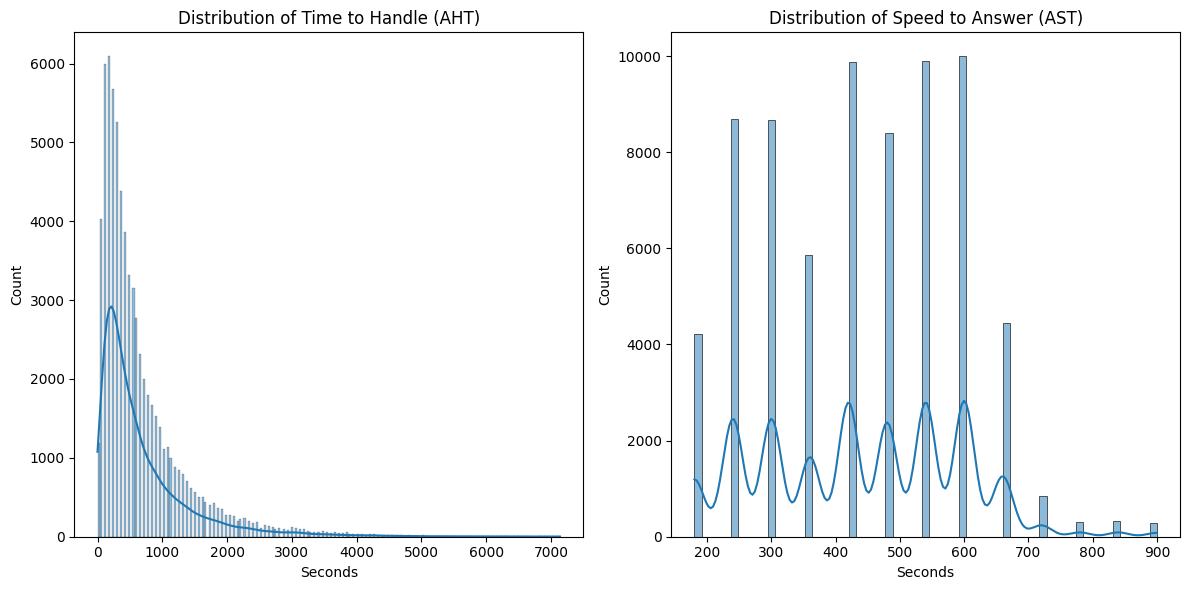

In [10]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(calls_df['AHT'], kde=True)
plt.title('Distribution of Time to Handle (AHT)')
plt.xlabel('Seconds')

plt.subplot(1, 2, 2)
sns.histplot(calls_df['AST'], kde=True)
plt.title('Distribution of Speed to Answer (AST)')
plt.xlabel('Seconds')

plt.tight_layout()
plt.show()


In [11]:
average_AHT = calls_df['AHT'].mean()
average_AST = calls_df['AST'].mean()

print(f"Average Handle Time (AHT): {average_AHT} seconds")
print(f"Average Speed to Answer (AST): {average_AST} seconds")

Average Handle Time (AHT): 697.0486004734717 seconds
Average Speed to Answer (AST): 437.0675393399248 seconds


In [12]:
calls_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0


In [13]:
customers_df.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [17]:
customers_df['elite_level_code'] = customers_df['elite_level_code'].fillna(0)
customers_df['elite_level_code'].unique()

array([4., 0., 2., 5., 1., 3.])

In [18]:
reason_df.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [31]:
calls_df = pd.merge(calls_df, reason_df, on='call_id', how='left')
calls_df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,primary_call_reason,customer_name_x,elite_level_code_x,customer_name_y,elite_level_code_y
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,Voluntary cancel,Matthew Foster,4.0,Matthew Foster,4.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,Booking,Tammy Walters,0.0,Tammy Walters,0.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,Irrops,Jeffery Dixon,0.0,Jeffery Dixon,0.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,Upgrade,David Wilkins,2.0,David Wilkins,2.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,Seating,Elizabeth Daniels,0.0,Elizabeth Daniels,0.0


In [23]:
calls_df['primary_call_reason'] = calls_df['primary_call_reason'].fillna('Unknown').apply(lambda x: ' '.join(x.split()).capitalize())
calls_df['primary_call_reason'].unique()

array(['Voluntary cancel', 'Booking', 'Irrops', 'Upgrade', 'Seating',
       'Mileage plus', 'Checkout', 'Unknown', 'Voluntary change',
       'Post flight', 'Check in', 'Other topics', 'Communications',
       'Schedule change', 'Products & services', 'Digital support',
       'Disability', 'Unaccompanied minor', 'Baggage', 'Traveler updates',
       'Etc', 'Post-flight', 'Check-in', 'Products and services'],
      dtype=object)

/tmp/ipykernel_4801/761978602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='primary_call_reason', data=calls_df, order=calls_df['primary_call_reason'].value_counts().index, palette='viridis')


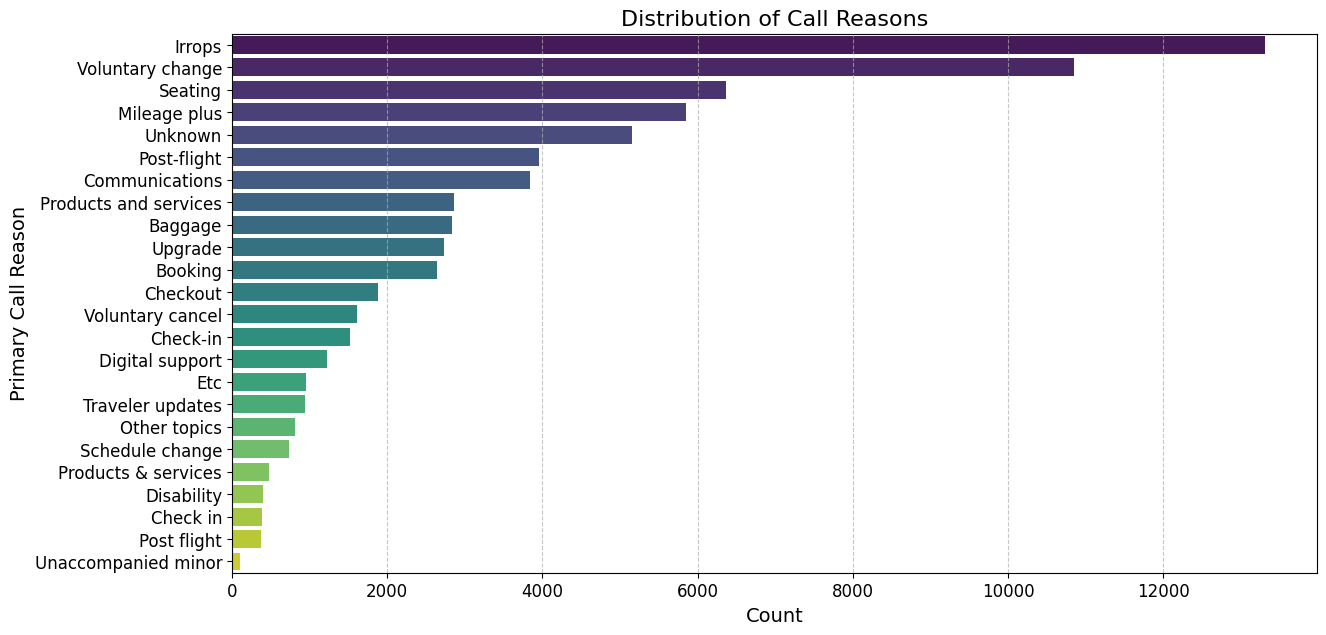

In [25]:
plt.figure(figsize=(14, 7))
sns.countplot(y='primary_call_reason', data=calls_df, order=calls_df['primary_call_reason'].value_counts().index, palette='viridis')
plt.title('Distribution of Call Reasons', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Primary Call Reason', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [26]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the necessary NLTK data
nltk.download('stopwords')

# Filter calls with 'Unknown' reason
unknown_reason_calls = calls_df[calls_df['primary_call_reason'] == 'Unknown']

# Preprocess the call transcripts
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

unknown_reason_calls['processed_transcript'] = unknown_reason_calls['call_transcript'].apply(preprocess_text)

# Generate a word cloud using bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(unknown_reason_calls['processed_transcript'])
bigrams = vectorizer.get_feature_names_out()
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(bigrams))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Unknown Call Reasons (Bigrams)')
plt.show()

# Topic modeling using LDA with bigrams
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

ModuleNotFoundError: No module named 'wordcloud'

In [29]:
# Merge calls_df and customers_df on customer_id
calls_df = pd.merge(calls_df, customers_df, on='customer_id', how='left')


ValueError: Could not interpret value `elite_level_code` for `x`. An entry with this name does not appear in `data`.

<Figure size 1400x700 with 0 Axes>

/tmp/ipykernel_4801/1678584405.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='elite_level_code_x', y='AHT', data=calls_df, palette='Set2')


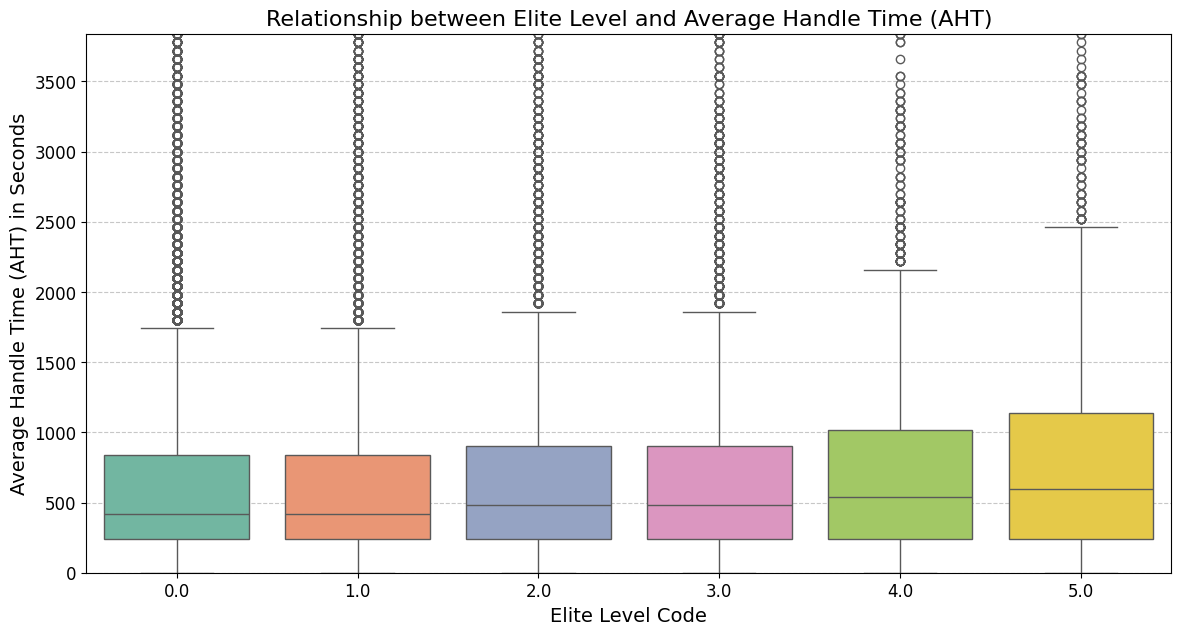

/tmp/ipykernel_4801/1678584405.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='elite_level_code_x', y='AST', data=calls_df, palette='Set3')


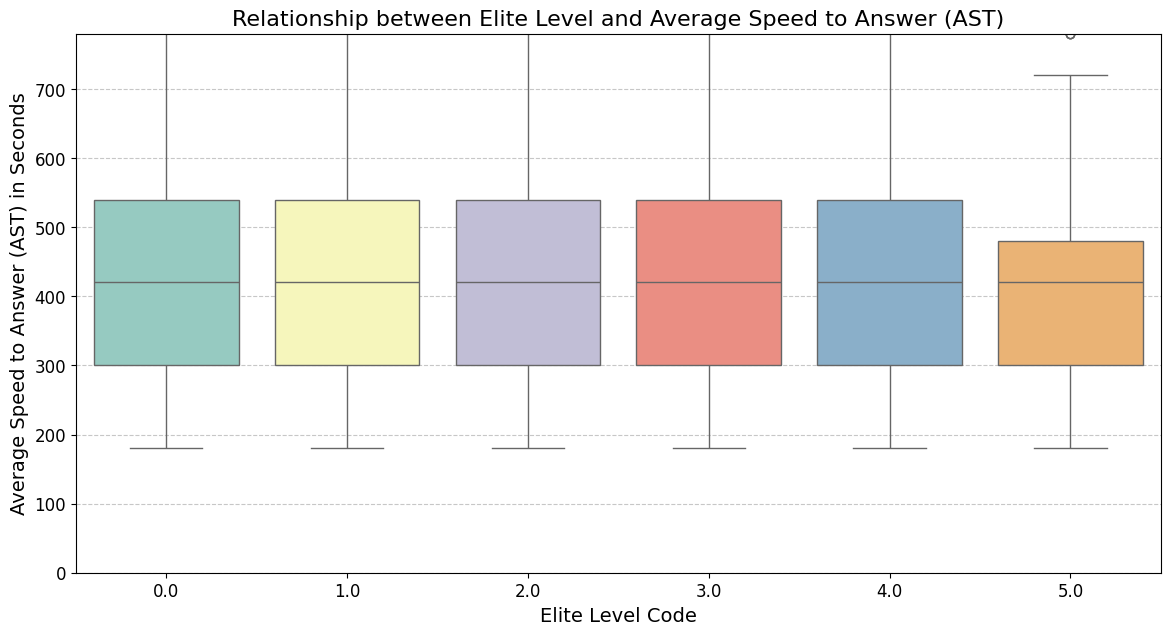

In [32]:

# Plot the relationship between elite level and AHT
plt.figure(figsize=(14, 7))
sns.boxplot(x='elite_level_code_x', y='AHT', data=calls_df, palette='Set2')
plt.title('Relationship between Elite Level and Average Handle Time (AHT)', fontsize=16)
plt.xlabel('Elite Level Code', fontsize=14)
plt.ylabel('Average Handle Time (AHT) in Seconds', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, calls_df['AHT'].quantile(0.99))  # Limit y-axis to 99th percentile to reduce outliers
plt.show()

# Plot the relationship between elite level and AST
plt.figure(figsize=(14, 7))
sns.boxplot(x='elite_level_code_x', y='AST', data=calls_df, palette='Set3')
plt.title('Relationship between Elite Level and Average Speed to Answer (AST)', fontsize=16)
plt.xlabel('Elite Level Code', fontsize=14)
plt.ylabel('Average Speed to Answer (AST) in Seconds', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, calls_df['AST'].quantile(0.99))  # Limit y-axis to 99th percentile to reduce outliers
plt.show()

In [33]:
# Calculate the frequency of each call reason
call_reason_counts = calls_df['primary_call_reason'].value_counts()

# Identify the most frequent and least frequent call reasons
most_frequent_reason = call_reason_counts.idxmax()
least_frequent_reason = call_reason_counts.idxmin()

# Calculate the average handling time for these call reasons
most_frequent_reason_AHT = calls_df[calls_df['primary_call_reason'] == most_frequent_reason]['AHT'].mean()
least_frequent_reason_AHT = calls_df[calls_df['primary_call_reason'] == least_frequent_reason]['AHT'].mean()

# Compute the percentage difference
percentage_difference = ((most_frequent_reason_AHT - least_frequent_reason_AHT) / least_frequent_reason_AHT) * 100

print(f"Most Frequent Call Reason: {most_frequent_reason} with AHT = {most_frequent_reason_AHT} seconds")
print(f"Least Frequent Call Reason: {least_frequent_reason} with AHT = {least_frequent_reason_AHT} seconds")
print(f"Percentage Difference in AHT: {percentage_difference:.2f}%")

Most Frequent Call Reason: Irrops with AHT = 785.1160694162722 seconds
Least Frequent Call Reason: Unaccompanied minor with AHT = 519.2307692307693 seconds
Percentage Difference in AHT: 51.21%


In [ ]:
sentiment_df.head(10)

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35
5,5297766997,817160,calm,calm,0.10,0.11
6,324593040,519057,neutral,frustrated,0.00,0.25
7,8902603117,488324,calm,angry,0.11,0.35
8,7222687732,957331,calm,neutral,0.06,0.54
9,4113684017,158319,neutral,angry,-0.19,0.29


In [34]:
# Merge calls_df and sentiment_df on call_id
calls_df = pd.merge(calls_df, sentiment_df, on='call_id', how='left')
calls_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,primary_call_reason,customer_name_x,elite_level_code_x,customer_name_y,elite_level_code_y,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,Voluntary cancel,Matthew Foster,4.0,Matthew Foster,4.0,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,Booking,Tammy Walters,0.0,Tammy Walters,0.0,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,Irrops,Jeffery Dixon,0.0,Jeffery Dixon,0.0,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,Upgrade,David Wilkins,2.0,David Wilkins,2.0,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,Seating,Elizabeth Daniels,0.0,Elizabeth Daniels,0.0,721730,neutral,polite,-0.05,0.35


In [35]:
calls_df.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,AHT,AST,primary_call_reason,customer_name_x,elite_level_code_x,customer_name_y,elite_level_code_y,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,1860.0,420.0,Voluntary cancel,Matthew Foster,4.0,Matthew Foster,4.0,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,720.0,180.0,Booking,Tammy Walters,0.0,Tammy Walters,0.0,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,1140.0,480.0,Irrops,Jeffery Dixon,0.0,Jeffery Dixon,0.0,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,420.0,300.0,Upgrade,David Wilkins,2.0,David Wilkins,2.0,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,540.0,600.0,Seating,Elizabeth Daniels,0.0,Elizabeth Daniels,0.0,721730,neutral,polite,-0.05,0.35


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import nltk
from nltk.corpus import stopwords
import string

# Ensure you have the necessary NLTK data
nltk.download('stopwords')

# Preprocess the call transcripts
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

calls_df['processed_transcript'] = calls_df['call_transcript'].apply(preprocess_text)

# Extract key phrases using TF-IDF and NMF
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
tfidf = vectorizer.fit_transform(calls_df['processed_transcript'])
nmf = NMF(n_components=10, random_state=42)
nmf.fit(tfidf)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_words = [feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]
        topics[f"Topic {topic_idx}"] = topic_words
    return topics

no_top_words = 10
topics = display_topics(nmf, vectorizer.get_feature_names_out(), no_top_words)

# Map topics to primary call reasons
topic_reason_mapping = {}
for topic, words in topics.items():
    for word in words:
        reasons = calls_df[calls_df['processed_transcript'].str.contains(word)]['primary_call_reason'].unique()
        topic_reason_mapping[topic] = reasons

# Display the mapping
for topic, reasons in topic_reason_mapping.items():
    print(f"{topic}: {', '.join(reasons)}")

# Identify recurring problems that could be resolved via self-service options
recurring_problems = {}
for topic, reasons in topic_reason_mapping.items():
    for reason in reasons:
        if reason not in recurring_problems:
            recurring_problems[reason] = []
        recurring_problems[reason].extend(topics[topic])

# Display the recurring problems
for reason, problems in recurring_problems.items():
    print(f"Primary Call Reason: {reason}")
    print(f"Recurring Problems: {', '.join(set(problems))}")
    print()

In [ ]:
# prompt: Using dataframe sentiment_df: can you visualize the sentiments with plots?

import altair as alt

# Histogram of average sentiment
alt.Chart(sentiment_df.head(200)).mark_bar().encode(
    alt.X("average_sentiment", bin=True),
    y='count()'
).properties(
    title="Distribution of Average Sentiment"
)
# Boxplot of sentiment by agent tone
alt.Chart(sentiment_df.head(200)).mark_boxplot().encode(
    x='agent_tone',
    y='average_sentiment'
).properties(
    title="Sentiment by Agent Tone"
)

# Scatter plot of sentiment vs silence percentage
alt.Chart(sentiment_df.head(200)).mark_circle().encode(
    x='average_sentiment',
    y='silence_percent_average'
).properties(
    title="Sentiment vs Silence Percentage"
)



/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [3]:
average_silence_percentage = sentiment_df['silence_percent_average'].mean()
print(f"Average Silence Percentage: {average_silence_percentage:.2f}%")

Average Silence Percentage: 0.29%
